https://twitter.com/SamuelGWalters/status/1195522345839910912

In [2]:
%display latex
var('x y z w u v')

(x, y, z, w, u, v)

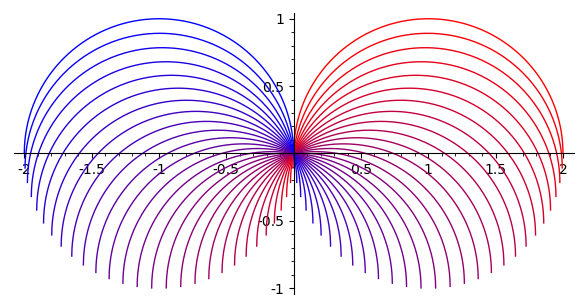

In [88]:
import numpy

def circ(theta):
    dx = cos(theta)
    dy = sin(theta)
    return plot(sqrt(1-(x-dx)^2)-dy,x,-1+dx,1+dx,ymin=-1,ymax=1,color=(1-theta/pi,0,theta/pi), aspect_ratio=1)
    
sum([circ(theta) for theta in numpy.linspace(0,float(pi),30)])

https://twitter.com/SamuelGWalters/status/1195522345839910912

Define $c(x) = \sqrt{1-x^2}$. The points $(x,c(x))$ lie on a semicircle
$$ A := \{(x,y) \mid x^2+y^2 = 1, y \geq 0 \} $$

# change of variables
(This part is not strictly necessary)

For $x, y \in [-1,1]$ have $x'=\frac{x+1}{2},y'=\frac{y+1}{2} \in [0,1]$:
\begin{align}
&\sqrt{x'-x'^2} - \sqrt{y'-y'^2} \leq \sqrt{\left|x'-y'\right|}
\\\iff& \sqrt{\frac{x+1}{2} - \frac{(x+1)^2}{4}} - 
\sqrt{\frac{y+1}{2} - \frac{(y+1)^2}{4}}  \leq \sqrt{\left|\frac{x+1}{2}-\frac{y+1}{2}\right|}
\\\iff& \sqrt{1-x^2} - \sqrt{1-y^2} \leq \sqrt{2|x-y|}
\\\iff& c(x) - c(y) \leq \sqrt{2|x-y|}
\end{align}

# an easy proof
Note that $c^2$ is Lipschitz on $[-1,1]$ with Lipschitz constant $2$:
$$|c(x)^2 - c(y)^2| = |x-y||x+y| \leq 2|x-y|$$
Therefore a similar calculation to the inverse triangle inequality yields
\begin{align}
&c(x)^2 - c(y)^2 \leq 2|x-y| \leq 2|x-y| + 2c(y)\sqrt{2|x-y|}
\\\implies& c(x)^2  \leq c(y)^2 + 2c(y)\sqrt{2|x-y|} + \sqrt{2|x-y|}^2
\\\iff& c(x)^2  \leq (c(y) + \sqrt{2|x-y|})^2
    \\\iff& c(x) \leq c(y) + \sqrt{2|x-y|}
    \\\iff& c(x) - c(y) \leq \sqrt{2|x-y|}
\end{align}

# a 'geometric' lemma

Define the union of two circles
\begin{align}
B =& \{ (x,y) \mid (x+1)^2 +y^2 \leq 1 \text{ or } (x-1)^2+y^2 \leq 1 \}  \\
=& \{ (x,y) \mid x^2+y^2 \leq 2|x| \} \label{lab}
\end{align}

__Lemma:__ $A-A \subset B$.

*Proof.* Let wlog. $(x,y),(z,w) \in A, x- z \geq 0$. $yw \geq 0$ holds.
$$ (x-z-1)^2 + (y-w)^2 = 1-2(-(1-x)(z+1) + yw) $$
It remains to prove $ (1-x)(z+1) \leq yw $.
Plugging in $y = \sqrt{1-x^2}, w=\sqrt{1-z^2}$ and squaring both sides:
$$ x^2z^2 + 2x^2z-2xz^2+x^2-4xz+z^2-2x+2z+1 \leq x^2z^2-x^2-z^2+1 $$
Subtracting the left-hand side and factoring:
$$ 0 \leq 2(x-z)(1-x)(z+1) $$
This holds, as each factor is nonnegative. $\square$

# an alternative proof

Given $x,y \in [-1,1]$, The lemma tells us $(x-y, c(x)-c(y)) \in A-A \subset B$. Hence

$$ (c(x) - c(y))^2 \leq (x-y)^2 + (c(x)-c(y))^2 \overset{\text{\eqref{lab}}}\leq 2|x-y| $$


## Calculations:

In [66]:
lhs = expand((1-x)^2*(z+1)^2)
rhs = expand((1-x^2)*(1-z^2))
display(lhs <= rhs)

x^2*z^2 + 2*x^2*z - 2*x*z^2 + x^2 - 4*x*z + z^2 - 2*x + 2*z + 1 <= x^2*z^2 - x^2 - z^2 + 1

In [67]:
0 <= factor(rhs - lhs)

0 <= -2*(x - z)*(x - 1)*(z + 1)

# Direct proof of Sam's inequality


$g(x) = x-x^2$ being Lipschitz with Lipschitz constant $1$ implies that $f(x) = \sqrt{g(x)}$ is $1/2$-Hölder with constant $1$:

Assume $A \geq B \geq 0, C \geq 0$ and $A-B \leq C$.
Then 
\begin{align}
A - B \leq C
\implies & A - B \leq C + 2\sqrt{CB}
\\\implies & A \leq C + 2\sqrt{CB} + B
\\\implies & A \leq (\sqrt{C} + \sqrt{B})^2
\\\implies & \sqrt{A} \leq \sqrt{C} + \sqrt{B}
\\\implies & \sqrt{A} - \sqrt{B} \leq \sqrt{C}
\end{align}

Now plug in $A=f(x),B=f(y),C=|x-y|$ or $A=f(y),B=f(x),C=|x-y|$, whichever is applicable.